# Math background

We begin with a brief review of some basic mathematical facts that will be useful in the remainder of the course.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

plt.rcParams['figure.dpi'] = 200

# A helper function for plotting functions
def plot(func, xlim=(-3,3), *args):
    x = np.linspace(*xlim, 250)
    fig, ax = plt.subplots(figsize=(8,6))
    ax.plot(x, func(x), *args)
    ax.grid(alpha=0.25)

## $e$ and the exponential function

Consider the function

$$f(n) = \left(1+{\frac {1}{n}}\right)^{n},$$

plotted below with values of $n$ ranging from 1 to 100. As $n$ increases, it approaches a value of approximately 2.718.

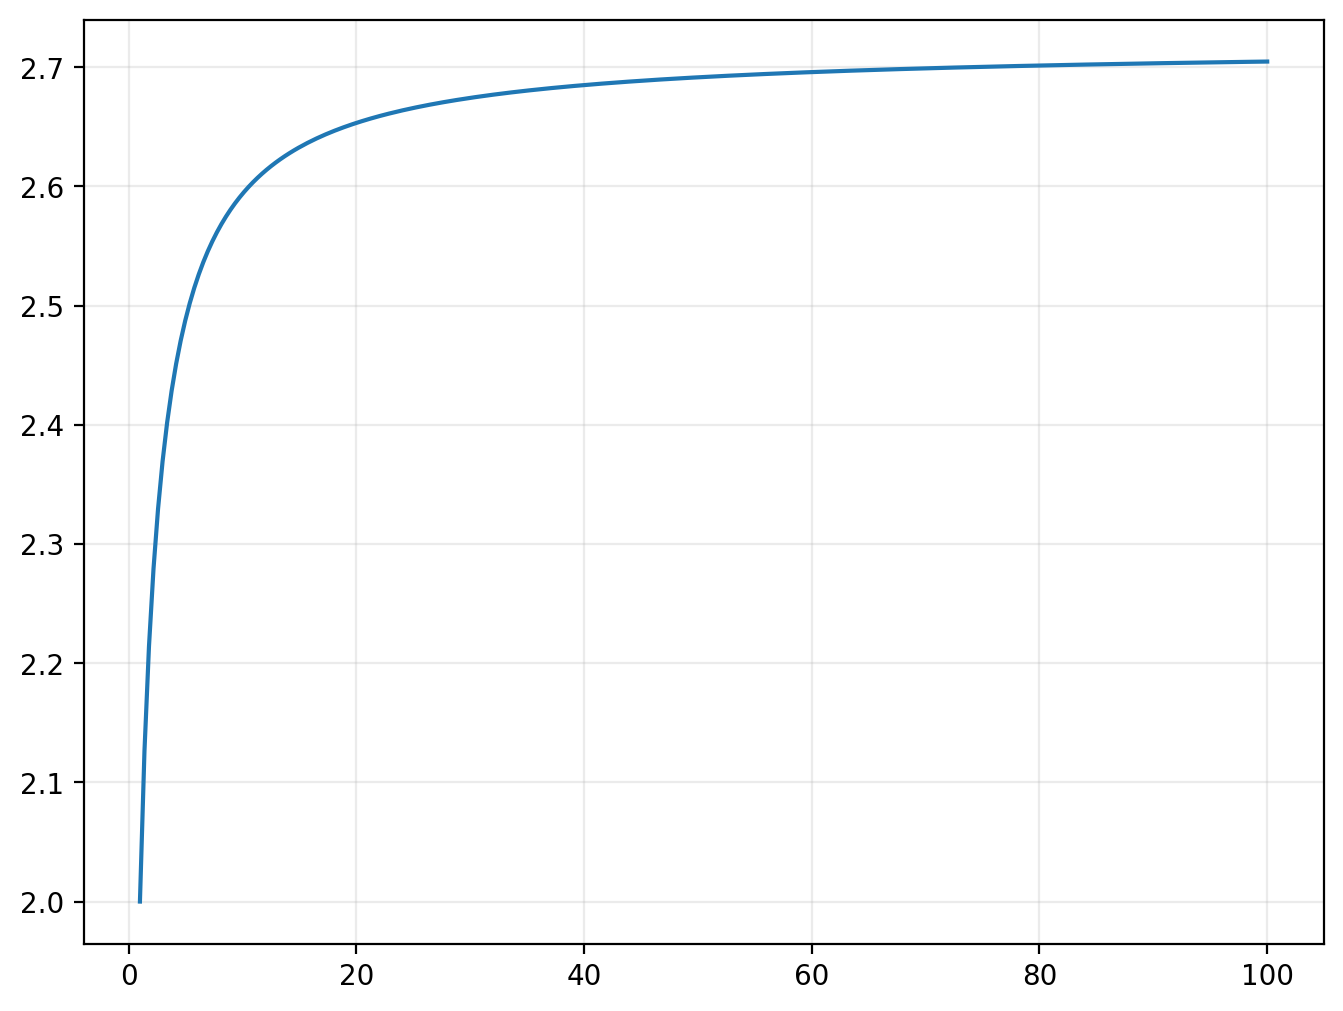

In [3]:
plot(lambda n: (1+1/n)**n, (1,100))

```{margin}
The number $e$ has a fascinating history, recounted in the excellent book [e: The Story of a Number](https://www.google.com/books/edition/E/BdKoQgAACAAJ?hl=en) by Eli Maor.
```



This number is the irrational number $e$, also called Euler's number; it is defined as

$$e := \lim _{n\to \infty }\left(1+{\frac {1}{n}}\right)^{n}.$$ 

More generally, the *exponential function* is defined as

$$\exp(x) := e^x = \lim _{n\to \infty }\left(1+{\frac {x}{n}}\right)^n.$$

:::{admonition} Extra credit
:class: admonition-extra-credit, dropdown

You may be wondering why this isn't written as

$$e^x = \lim _{n\to \infty }\left(1+{\frac {1}{n}}\right)^{nx}.$$

The two are equivalent. To see this, let $k=\frac{n}{x}$. For a fixed value of $x$, as $n\to\infty$, $k\to\infty$. So

\begin{equation*}
\lim_{n\to \infty }\left(1+{\frac {x}{n}}\right)^n = \lim_{k\to \infty }\left(1+{\frac{1}{k}}\right)^{kx} = \left[\lim_{k\to \infty }\left(1+{\frac{1}{k}}\right)^{k}\right]^x = e^x.
\end{equation*}
:::

The exponential function plays a critical role in models of things that grow, be it bacteria in a culture or money in a bank account. As the figure below makes clear, the function gets large very quickly.

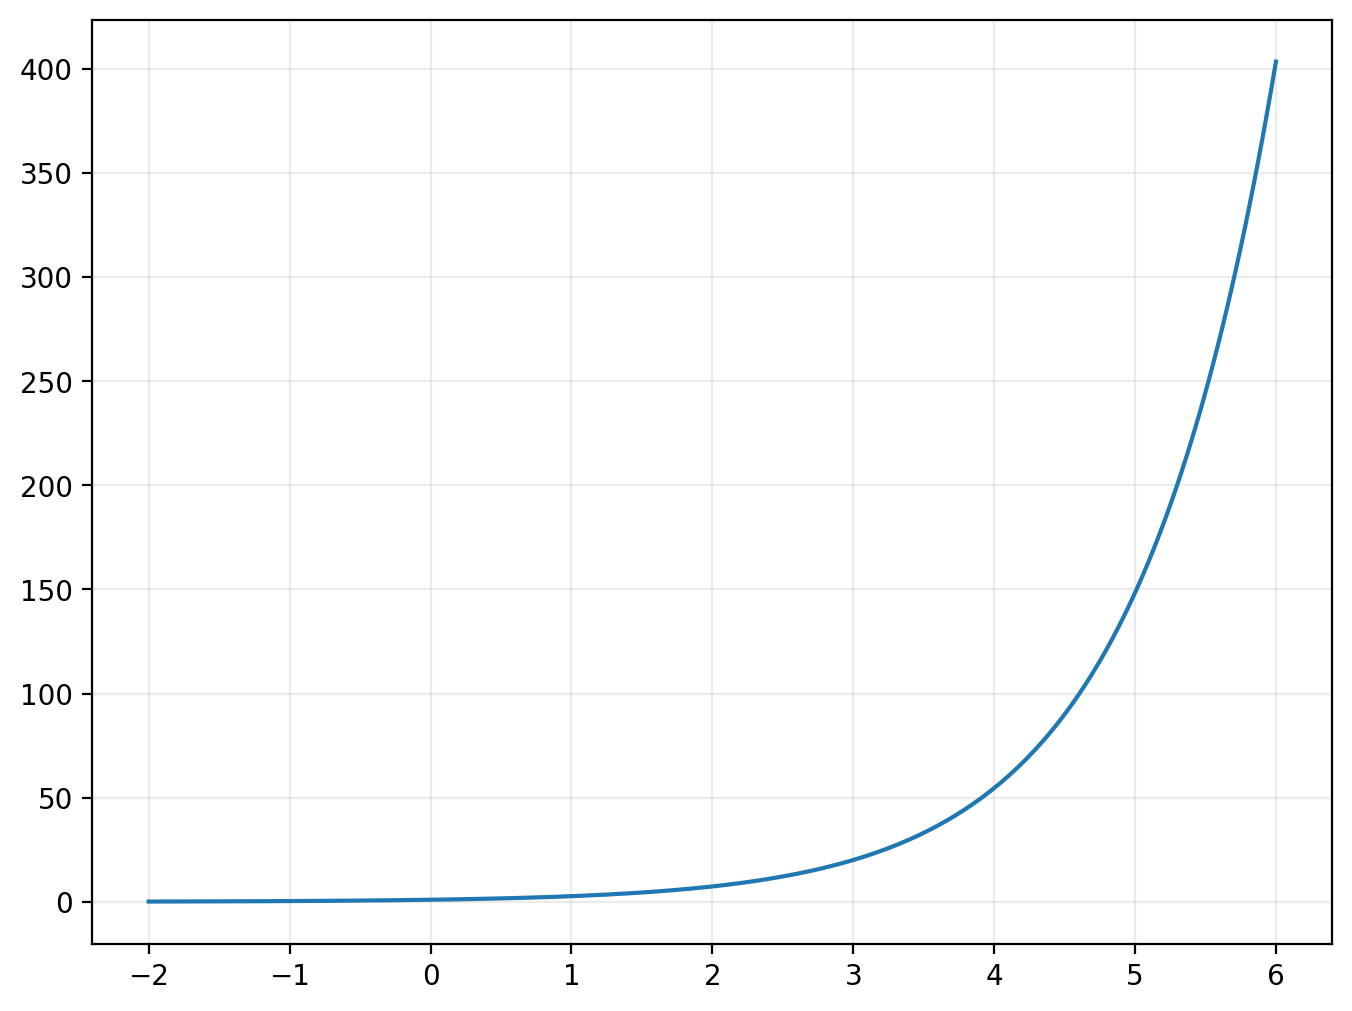

In [4]:
from numpy import exp

[exp(x) for x in [0, 1, 2]]

plot(exp, xlim=(-2,6))

```{admonition} Fun fact
:class: tip
If you want to impress your friends tell them [that](https://twitter.com/phalpern/status/1238889392162439169)

$$e^{\pi i} + 1 = 0.$$

If you *really* want to impress them, [prove it!](https://en.wikipedia.org/wiki/Euler%27s_formula)
```

The inverse of the exponential function is the natural logarithm:

$$\ln(e^x) = x.$$

Economists just call the natural logarithm “log”; there is never a need to distinguish this from the logarithm in any other base.

```{margin}
While $e^{\ln(10)}$ is obviously exactly equal to 10, note that the answer is represented with a tiny amount of error. This is due to the [accuracy problems](https://en.wikipedia.org/wiki/Floating-point_arithmetic#Accuracy_problems) inherent in the floating-point system for representing real numbers. For all practical purposes in financial applications, errors this small will be irrelevant.
```

In [3]:
from numpy import log, pi as π

In [6]:
exp(log(10))

10.000000000000002

In [7]:
log(10)

2.302585092994046

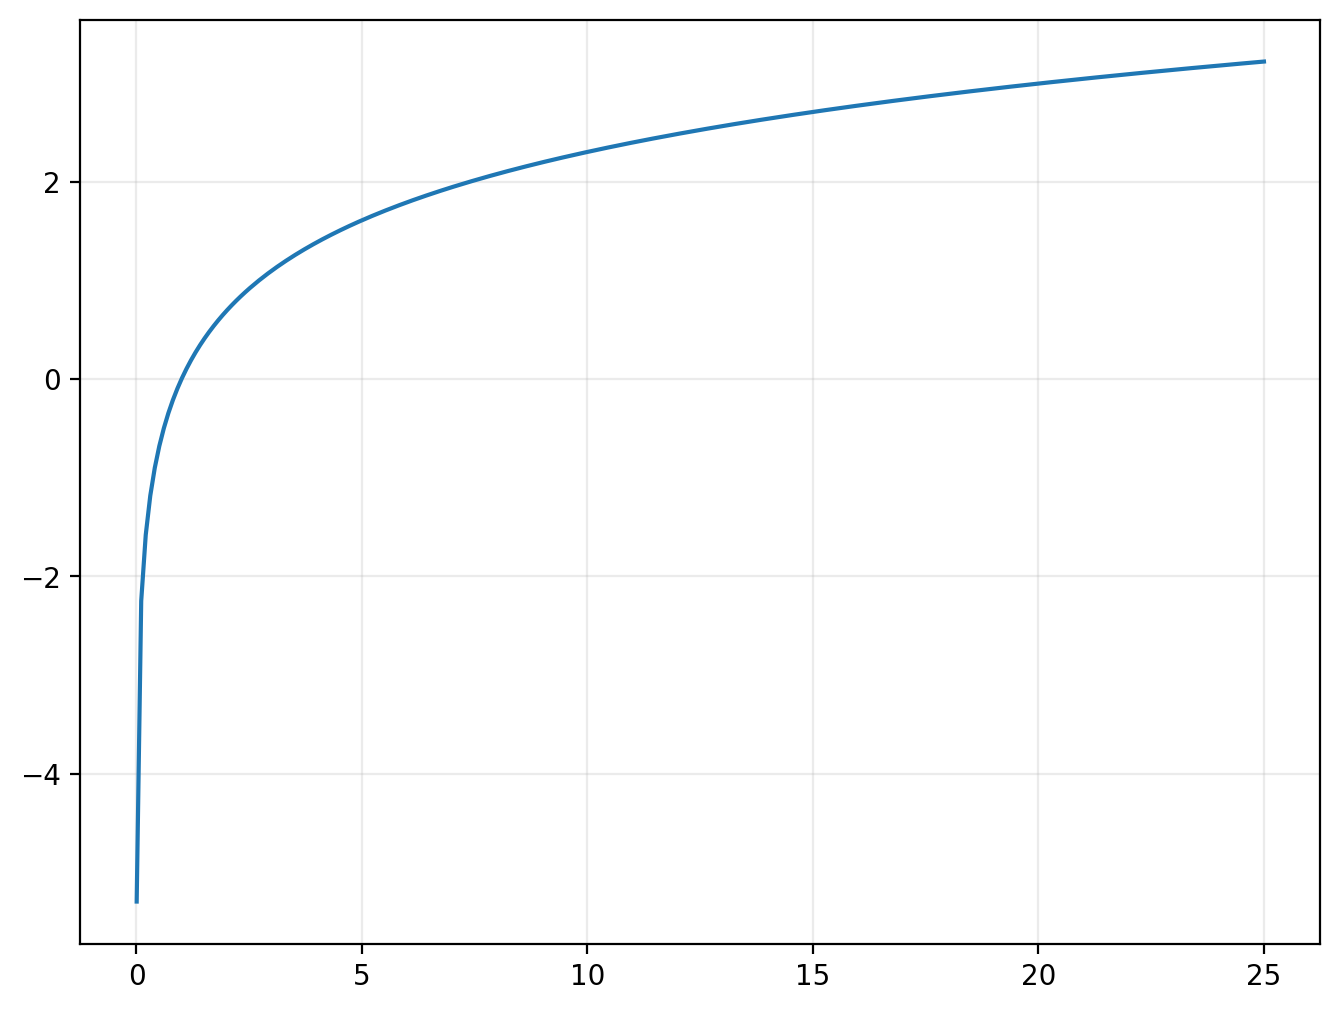

In [8]:
plot(log, (0.005,25))

Logarithms have the property that

$$\ln(xy) = \ln(x) + \ln(y).$$

## Factorials

The factorial of a positive integer $n$ is the product of all integers from 1 up to $n$:

$${\displaystyle n!=n\cdot (n-1)\cdot (n-2)\cdot (n-3)\cdot \cdots \cdot 3\cdot 2\cdot 1\,.}$$

In [9]:
from scipy.special import factorial

In [10]:
factorial(5)

120.0

In [11]:
np.product(range(1,6))

120

## Combinations

Factorials are critical for calculating the probabilities of possible outcomes. Given a set of $n$ elements a *combination* is a choice of $k$ items without regard to the ordering. There are $_nC_k$ (“*n*-choose-*k*”) ways to select such a combination, where

$$_nC_k = \binom{n}{k} := \frac{n!}{k!(n-k)!}.$$

$_nC_k$ is also referred to as the *binomial coefficient*.

For example, there are six ways we can choose two items from a set of four items:

In [12]:
from scipy.special import comb

comb(4,2)

6.0

## Infinite series

Consider the infinite series

\begin{align*}
S &= a+a x+a x^{2}+a x^{3} + \cdots \\
&= \sum_{k=0}^{\infty} a x^{k}.
\end{align*}

If $x<1$, the series converges, since $\lim_{k\to\infty} x^k = 0.$ We can solve for $S$ by noting that

$$x S = a x + a x^{2} + a x^{3} + \cdots,$$

which implies that 

$$S-x S=a,$$

and therefore

$$S=\frac{a}{1-x}.$$

## Functions

A function is a mapping from an input to an output. For example,

```{math}
:label: func
f(x) = 2x^2 - 3
```

is a function of the variable $x$. Since $x$ can take any real value and return a real value, we write $f\!: \R \rightarrow \R$. (Actually, this particular $f$ will also work on complex numbers, which we do not consider.)

We might think of the function in {eq}`func` as a special case of a more general set of functions with parameters $a$, $b$, $c$,

$$f(x; a, b, c) = ax^2 + bx + c.$$

The parameters — also called “coefficients” — are typically considered fixed, whereas $x$ is a variable. The figure below shows three such functions, with different parameters $(a, b, c)$.

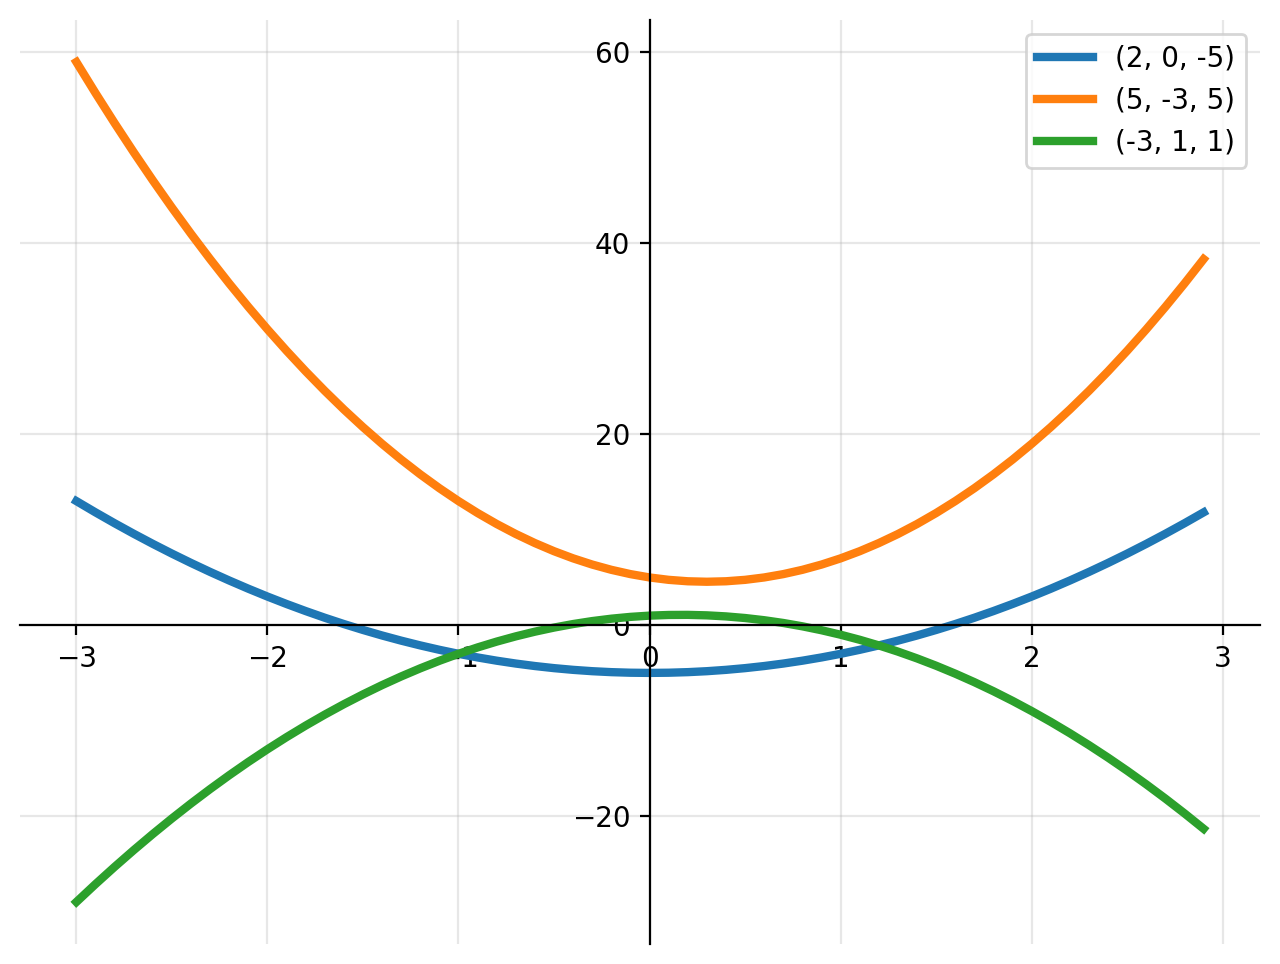

In [13]:
def f(x, a, b, c):
    return a*x**2 + b*x + c

fig, ax = plt.subplots(figsize=(8,6))

# Set up the spines
for loc in ['right', 'top']:
    ax.spines[loc].set_color('none')
for loc in ['bottom', 'left']:
    ax.spines[loc].set_position(('data',0))
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')

x = np.arange(-3, 3, 0.1)
for params in [(2,0,-5), (5,-3,5), (-3,1,1)]:
    ax.plot(x, f(x, *params), label=params, lw=3)

ax.legend(loc='upper right')
ax.grid(alpha=0.3)
plt.show()

## The fundamental theorems of calculus

Let $f$ be a continuous function defined on the closed interval $[a,b]$. Let $F$ be the function defined as

$$F(x) = \int_a^x f(z) \, dz.$$

Then $F$ is differentiable on the open interval $(a,b)$ and 

$$F'(x) = f(x)$$

for all $x$ in $(a,b)$. Moreover,

$$\int_a^b f(x) \, dx = F(b) - F(a).$$

That is, the area under the curve $f(x)$ from the $a$ to $b$ is the difference in the integral evaluated at those points.

### Linearity of integrals

The integral of a linear combination is the linear combination of the integrals. That is, given two functions $f(x)$ and $g(x)$, and constants $\alpha$ and $\beta$,

$$\int _{a}^{b}[\alpha f(x)+\beta g(x)]\,dx=\alpha \int _{a}^{b}f(x)\,dx+\beta \int _{a}^{b}g(x)\,dx.$$

(sec-gauss-integral)=
## The Gaussian integral

Consider the function 

$$f(z) = e^{-z^2},$$

plotted below:

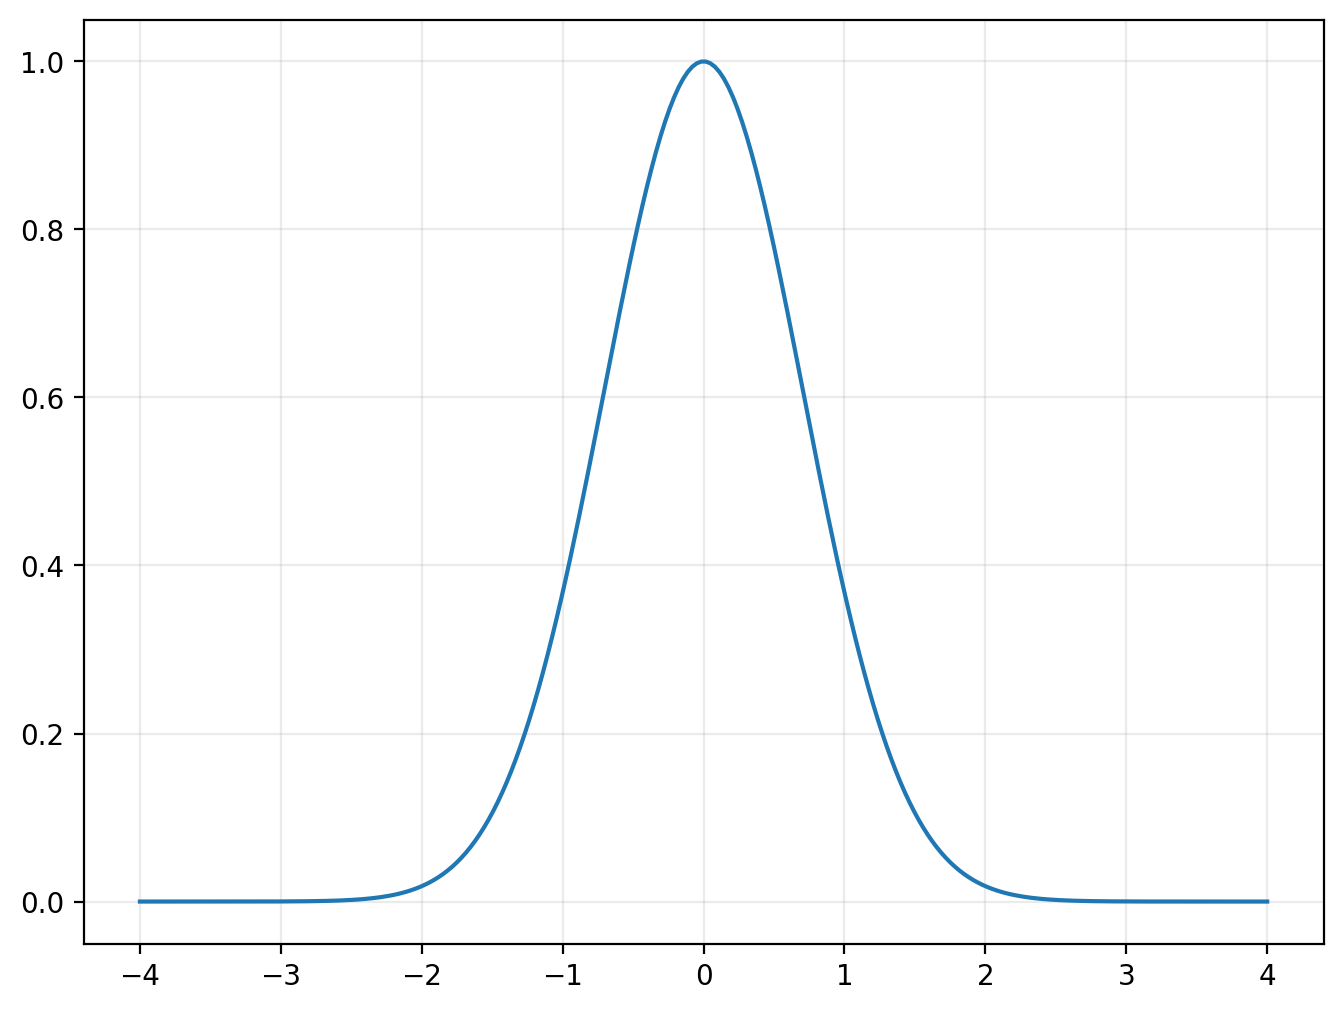

In [14]:
plot(lambda z: np.exp(-z**2), xlim=(-4,4))

Somewhat incredibly, the area under this curve — called the Gaussian integral, named for [Carl Friedrich Gauss](https://en.wikipedia.org/wiki/Carl_Friedrich_Gauss) — is $\sqrt{\pi}$:

$$\int _{-\infty }^{\infty }e^{-z^2}\,dz = \sqrt{\pi}.$$ (gauss_integral)

We can confirm using the `sympy` package for doing symbolic math.

In [15]:
import sympy

# Two "o"s represent infinity
from sympy import oo

z = sympy.symbols('z')

# Calculate the Gaussian integral
sympy.integrate(sympy.exp(-z**2), (z, -oo, oo))

sqrt(pi)

For a more general form of the integral, use the change of variables

$$z = \frac{x-b}{\sqrt{2c^2}},$$

where $b$ and $c$ are constants, implying that

$$dz = \frac{dx}{\sqrt{2c^2}}.$$

Then

\begin{equation*}
{\large\int_{-\infty }^{\infty }} \exp(-z^2)\,dz \; = \; \frac{1}{\sqrt{2c^2}} {\large\int_{-\infty }^{\infty }}\exp\left\{-\frac{1}{2}\left(\frac{x-b}{c}\right)^2\right\}dx,
\end{equation*}

so

$${\large\int_{-\infty }^{\infty }}\exp\left\{-\frac{1}{2}\left(\frac{x-b}{c}\right)^2\right\}dx = \sqrt{2 \pi c^2}.$$

We will revisit this fact when we discuss the normal probability distribution.

## The gamma function

The gamma function,

$$\Gamma(x) := \int _{0}^{\infty }s^{x-1}e^{-s}ds, \quad x>0,$$

is a generalization of the factorial. That is, for any positive integer $n$,

$$\Gamma(n+1) = n\Gamma(n) = n!$$

But $\Gamma(x)$ is defined over any positive real number, not just the integers. It is effectively a continuous function that connects the values of the factorial function, as shown below.

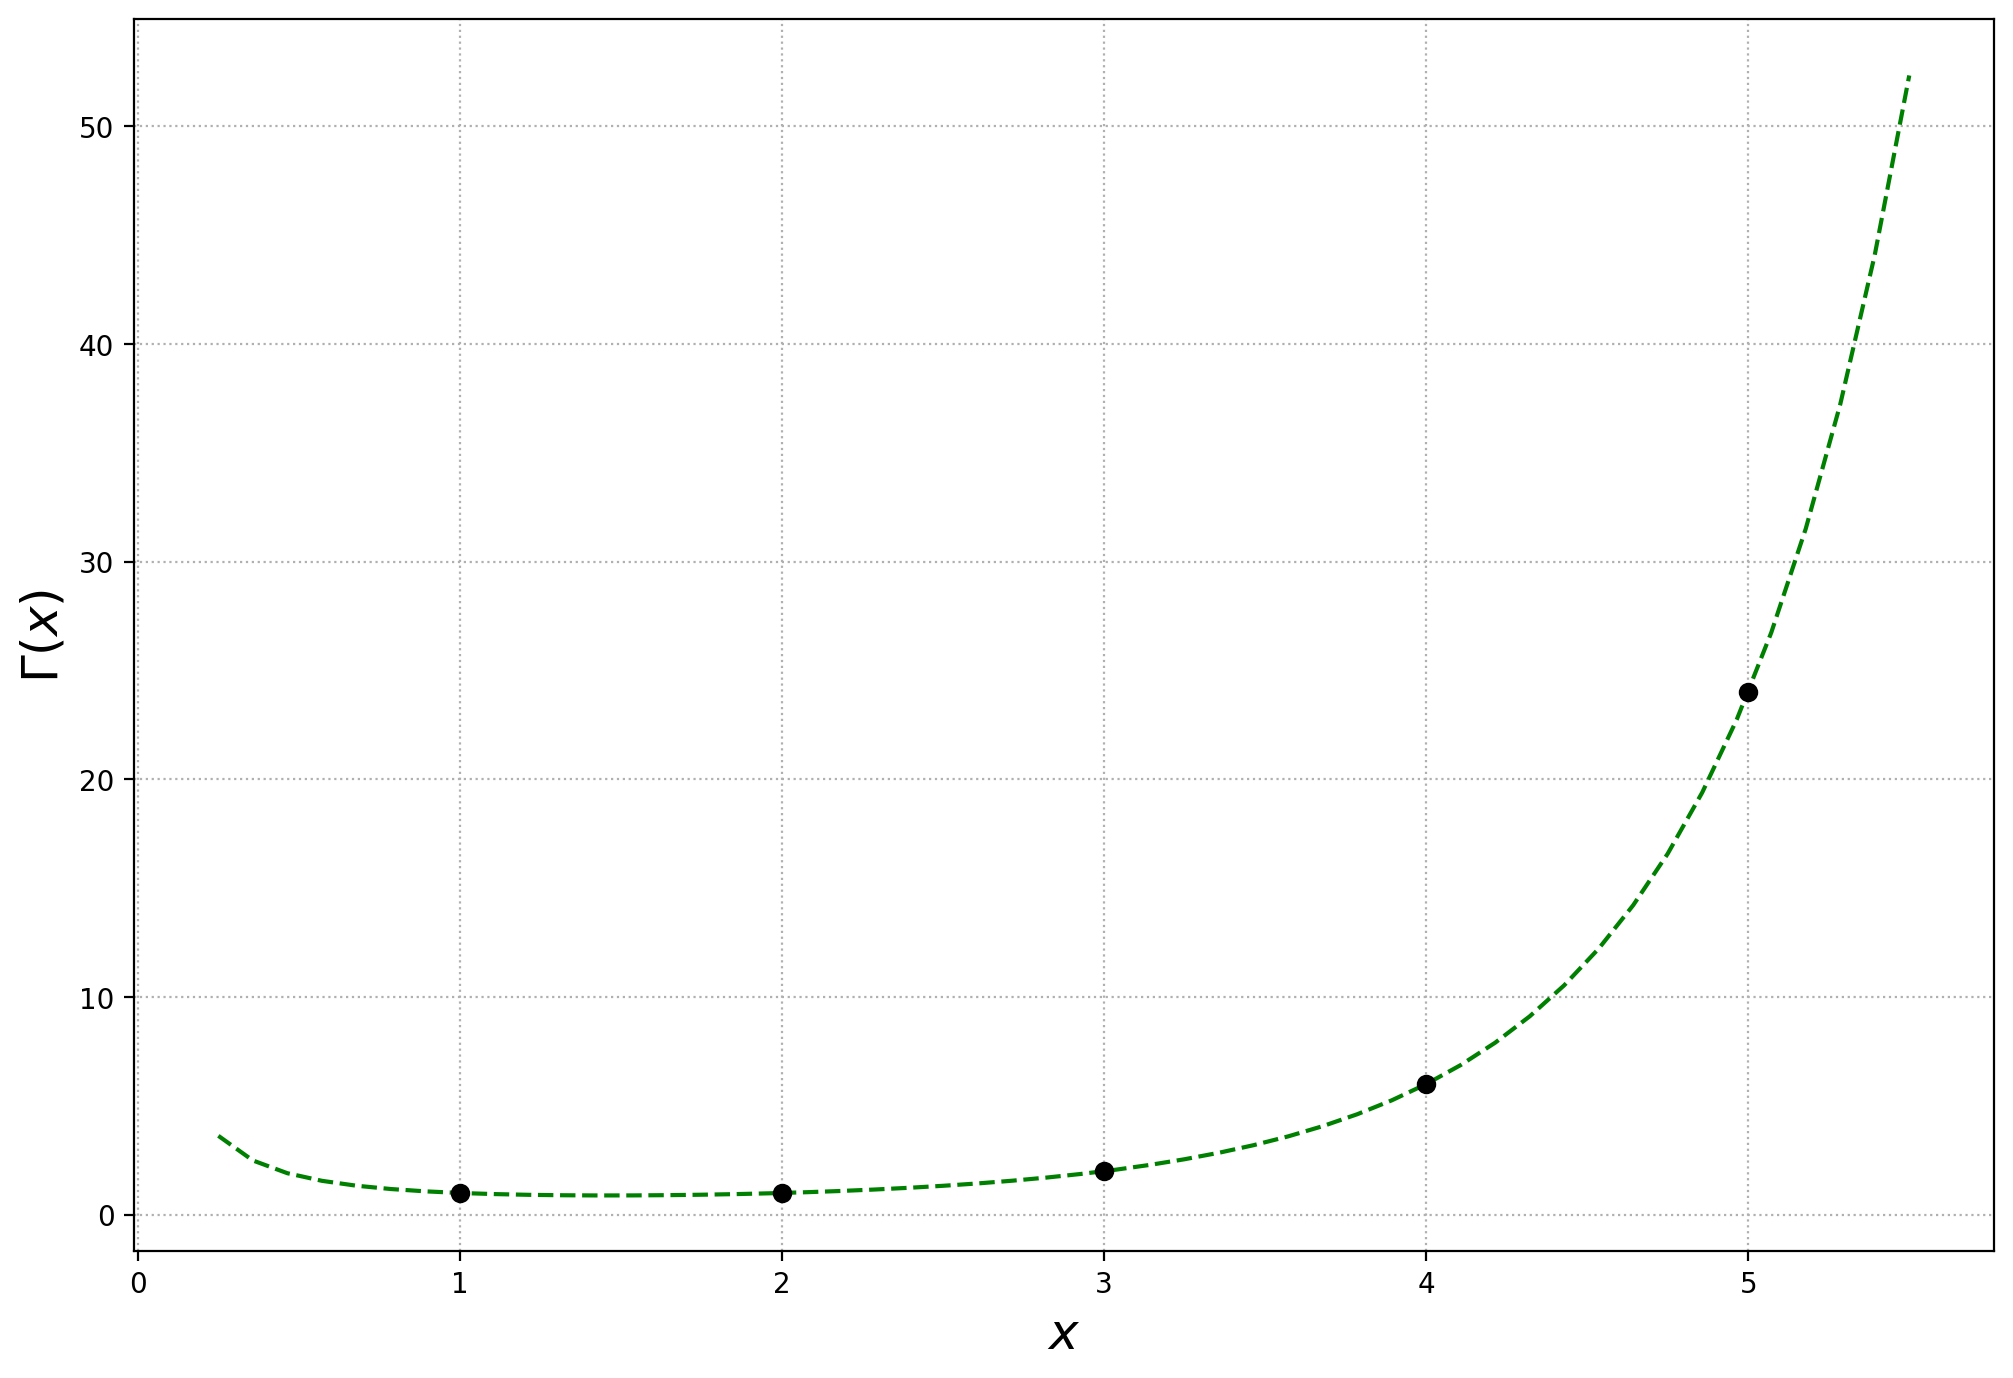

In [16]:
from scipy.special import gamma

plt.figure(figsize=(12,8))

z = np.linspace(0.25,5.5,50)
plt.plot(z, gamma(z), 'g--')

n = np.arange(6)
plt.plot(n, gamma(n), 'ko')

plt.xlabel('$x$', fontsize=18)
plt.ylabel('$\Gamma(x)$', fontsize=18)
plt.grid(ls=':')
plt.show()

Another useful fact about the gamma function is that 

$$\Gamma\left(\frac{1}{2}\right) = \sqrt{\pi}.$$

:::{admonition} Extra credit
:class: admonition-extra-credit, dropdown

This can be seen by writing the Gaussian integral {eq}`gauss_integral` as

$$\sqrt{\pi} = \int _{-\infty }^{\infty }e^{-z^{2}}dz=2\int _{0}^{\infty }e^{-z^{2}}dz.$$

The second equality follows from the fact that $e^{-z^2}$ is an *even* function, meaning it is symmetric about zero — that is, $f(x)=f(-x)$.

After the change of variable $z=\sqrt{s}$,

$$2\int _{0}^{\infty}e^{-z^2}dz = 2\int_{0}^{\infty}\frac{1}{2}\ e^{-s}\ s^{-\frac{1}{2}}ds = \int_{0}^{\infty}e^{-s}\ s^{-\frac{1}{2}}ds = \Gamma \left({\frac {1}{2}}\right).$$

:::

```{admonition} Exercise

Using the `gamma` function defined in `scipy.special`, write a loop that that confirms that

$$\Gamma(n+1) = n\Gamma(n)$$

for $n\in\{1,2,\ldots,5\}$.
```

:::{admonition} Solution
:class: admonition-solution, dropdown


```
from scipy.special import gamma as Γ

for n in range(1,6):
    assert n*Γ(n) == Γ(n+1)
:::

(TaylorSeries)=
## Taylor series

The Taylor series approximation of a function, $f(x)$, around some point $a$ is

$$f(x) = f(a) + f'(a)(x-a) + \frac{f''(a)}{2!}(x-a)^{2} + \frac{f'''(a)}{3!}(x-a)^{3} + \cdots$$

where $f'$ is the first derivative, $f''$ is the second derivative, etc.

As we add more terms to the expansion, we will get arbitrarily close to the true function $f(x)$ as long as we stay near $a$. For example, let

$$f(x) = \ln(1+x),$$

and take the expansion around $a=0$,

\begin{align*}
\ln(1+x) &= \ln(1+a) + (1+a)^{-1}(x-a) - \frac{(1+a)^{-2}}{2}(x-a)^2 + \frac{2(1+a)^{-3}}{6}(x-a)^3 \cdots \\
&= 0 + x - \frac{1}{2}x^2 + \frac{1}{3}x^3 - \frac{1}{4}x^4 + \cdots \\
&= \sum_{k=1}^{\infty} \frac{(-1)^{k-1} x^k}{k}.
\end{align*}

:::{admonition} Key fact
:class: admonition-key-fact

If we keep only the first term of the expansion, we get a very useful fact about the logarithm function, namely that, when $x$ is close to zero,

$$\ln(1+x) \approx x.$$
:::

As the table below shows, the approximation is quite close for small numbers, but starts to degrade when $x>0.1.$

In [17]:
x = np.logspace(-3,0,6)
tbl = pd.DataFrame({'x': x, 'log(1+x)': log(1+x)})
tbl['Error'] = tbl.iloc[:,1] - tbl.iloc[:,0]
tbl['% Error'] = tbl['Error'] / tbl.iloc[:,1] * 100
tbl['% Error'] = tbl['% Error'].apply(lambda x: '{:.2f}%'.format(x))
tbl.style.hide(axis="index")

x,log(1+x),Error,% Error
0.001000,0.001000,-0.000000,-0.05%
0.003981,0.003973,-0.000008,-0.20%
0.015849,0.015725,-0.000124,-0.79%
0.063096,0.061185,-0.001911,-3.12%
0.251189,0.224094,-0.027095,-12.09%
1.000000,0.693147,-0.306853,-44.27%


Including higher-order terms improves the approximation, as shown here:

In [18]:
def plot_taylor_ln1px(n):
    '''Plot the Taylor series expansion of ln(1+x) near 0'''
    fig, ax = plt.subplots(figsize=(8,6))
    ax.set_xlim(-1.5,1.5)
    ax.set_ylim(-4,2)
    # Set up the spines
    for loc in ['right', 'top']:
        ax.spines[loc].set_color('none')
    for loc in ['bottom', 'left']:
        ax.spines[loc].set_position(('data',0))
    ax.xaxis.set_ticks_position('bottom')
    ax.yaxis.set_ticks_position('left')

    x = np.arange(-1.5, 1.5, 0.001)
    
    # Draw f(x) over x > -1
    fx = np.log(x[x>-1]+1)
    ax.plot(x[x>-1], fx, '-', color='r', lw=3)

    # Draw the Taylor approximation
    approx = 0
    for k in range(1,n+1):
        approx += (-1)**(k-1) * (1/k) * x**k
        
    ax.plot(x, approx, 'k--', lw=3)
    ax.text(-1, 1, f'N={n}', fontsize=18)

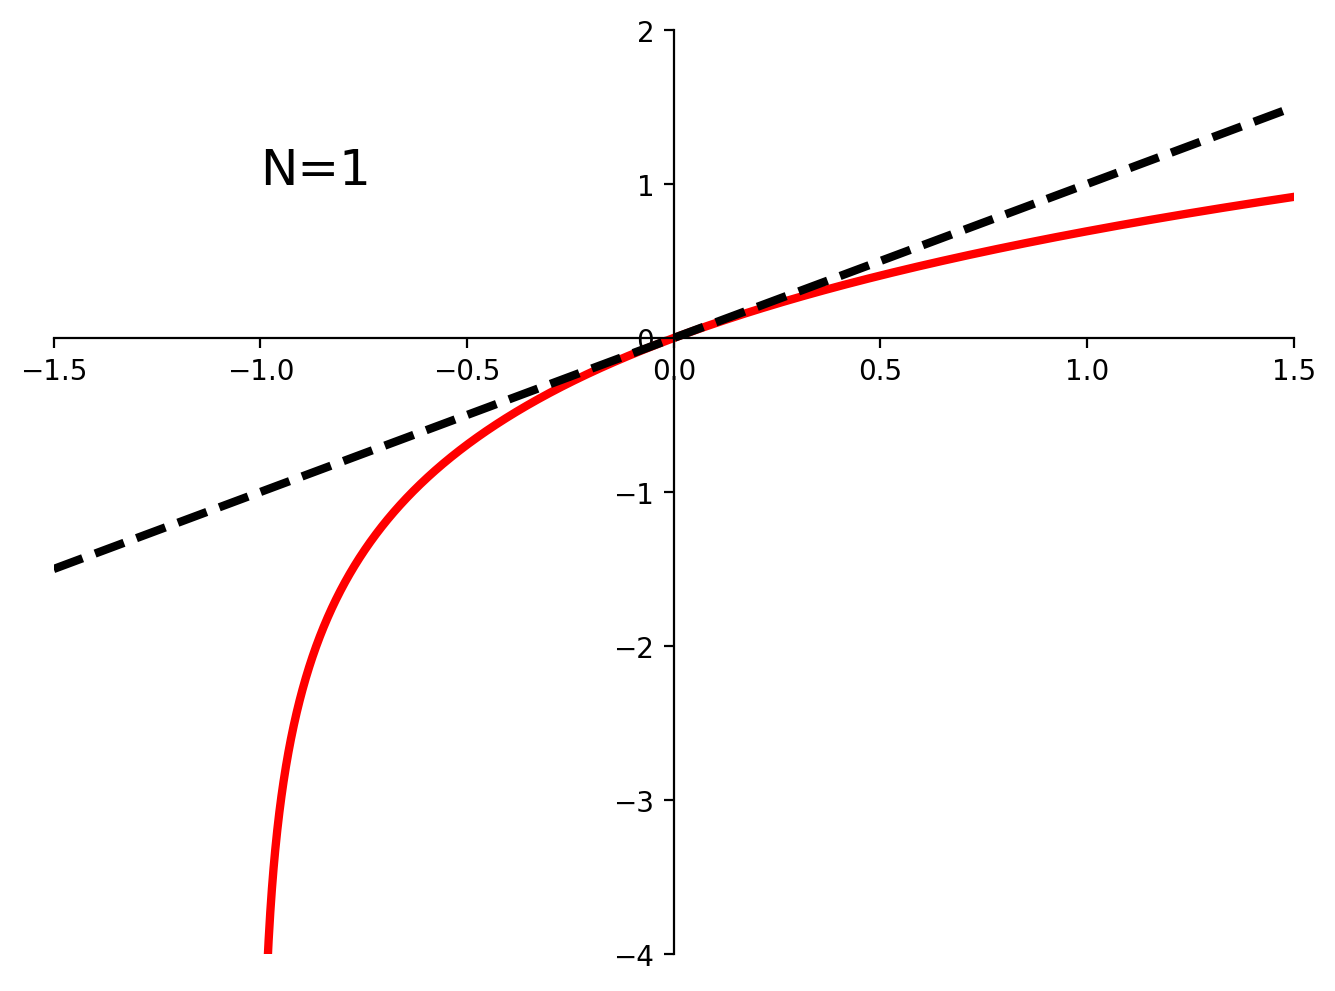

In [19]:
plot_taylor_ln1px(1)

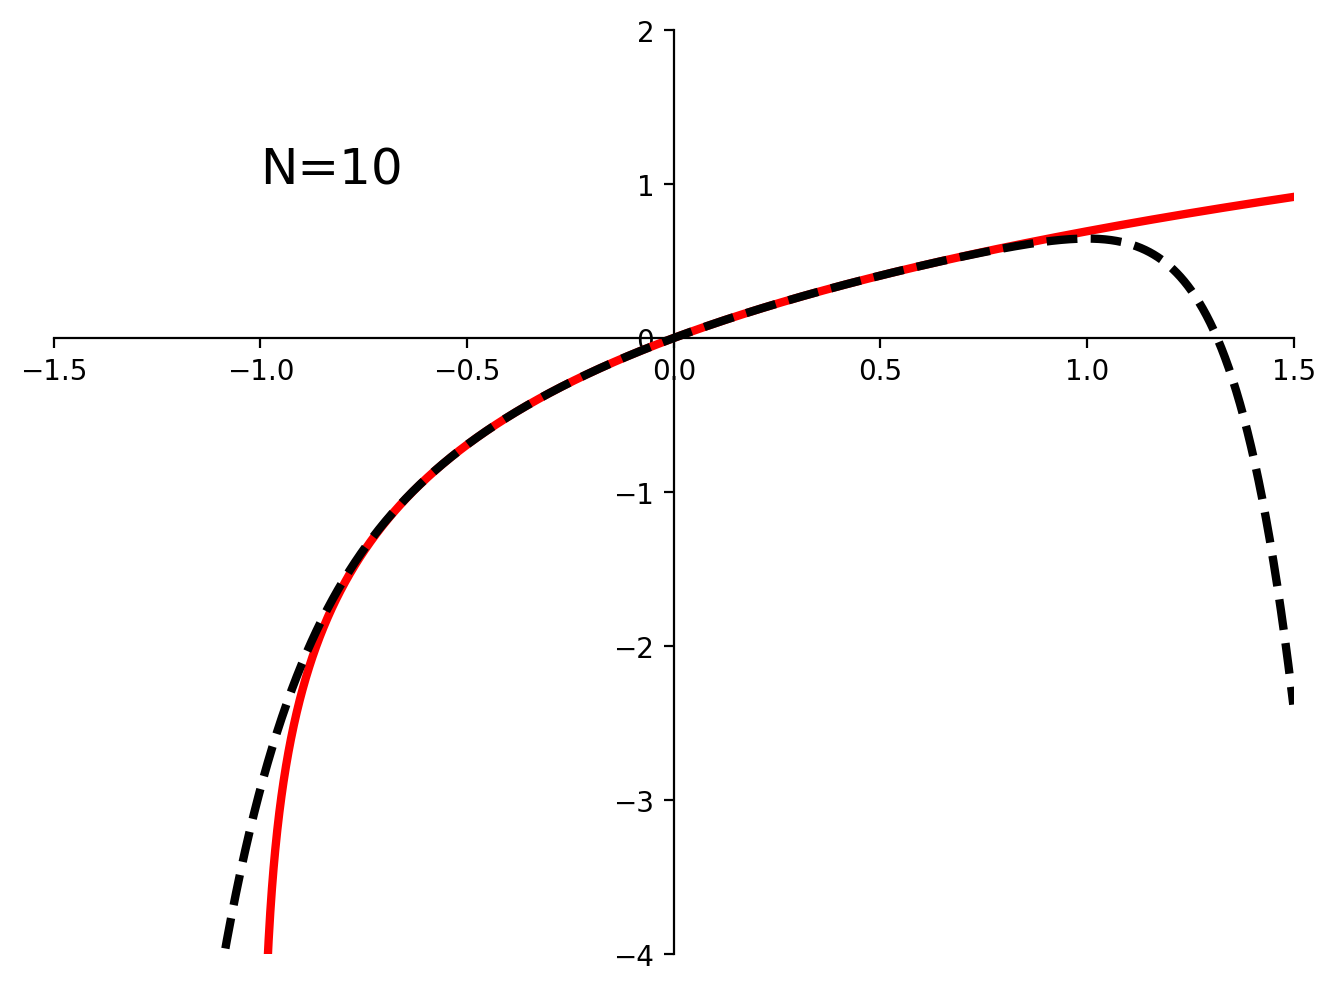

In [20]:
plot_taylor_ln1px(10)

Notice that as we increase the number of terms in the polynomial the approximation (black dotted line) stays closer to the true function (red) for a wider range of values.

:::{admonition} Exercise

Find the Taylor series expansion of $e^x$ around $x_0=0$. Write out the first four terms.

:::

:::{admonition} Solution
:class: admonition-solution, dropdown

Since the derivative of $e^x$ is also $e^x$, we have $f(0) = 1$, $f'(0)=1$, and so on for all derivatives. The series therefore simplifies to

$$e^x = 1 + x + \frac{x^2}{2} + \frac{x^3}{3!} + \frac{x^4}{4!} + \cdots = \sum_{k=1}^{\infty} \frac{x^k}{k!}.$$

:::

## Vectors

A (Euclidean) vector is is a geometric object with direction and length.

For example, the vector (4,2) originates at the origin (0,0) and ends at the point (4,2).

In [21]:
a = np.array([4,2])
b = np.array([-2,1])
c = np.array([-1,-2])
d = np.array([3,-4])

In [22]:
def plot_vectors(vecs, lims):
    '''A function for plotting vectors'''
    from matplotlib import cm
    
    fig, ax = plt.subplots(figsize=(10, 8))

    # Set the axes through the origin
    for spine in ['left', 'bottom']:
        ax.spines[spine].set_position('zero')
    for spine in ['right', 'top']:
        ax.spines[spine].set_color('none')

    ax.set(xlim=lims, ylim=lims)
    ax.grid(ls=':')

    # draw vectors
    colors = cm.viridis(np.linspace(0,1,len(vecs)))
    
    for v,c in zip(vecs,colors):
        v = v.flatten()
        ax.arrow(0, 0, *v,
                 head_width=0.15, head_length=0.15,
                 length_includes_head=True,
                 fc=c, ec=c,
                 label='({:.1f}, {:.1f})'.format(*v))
    plt.legend()
    plt.show()

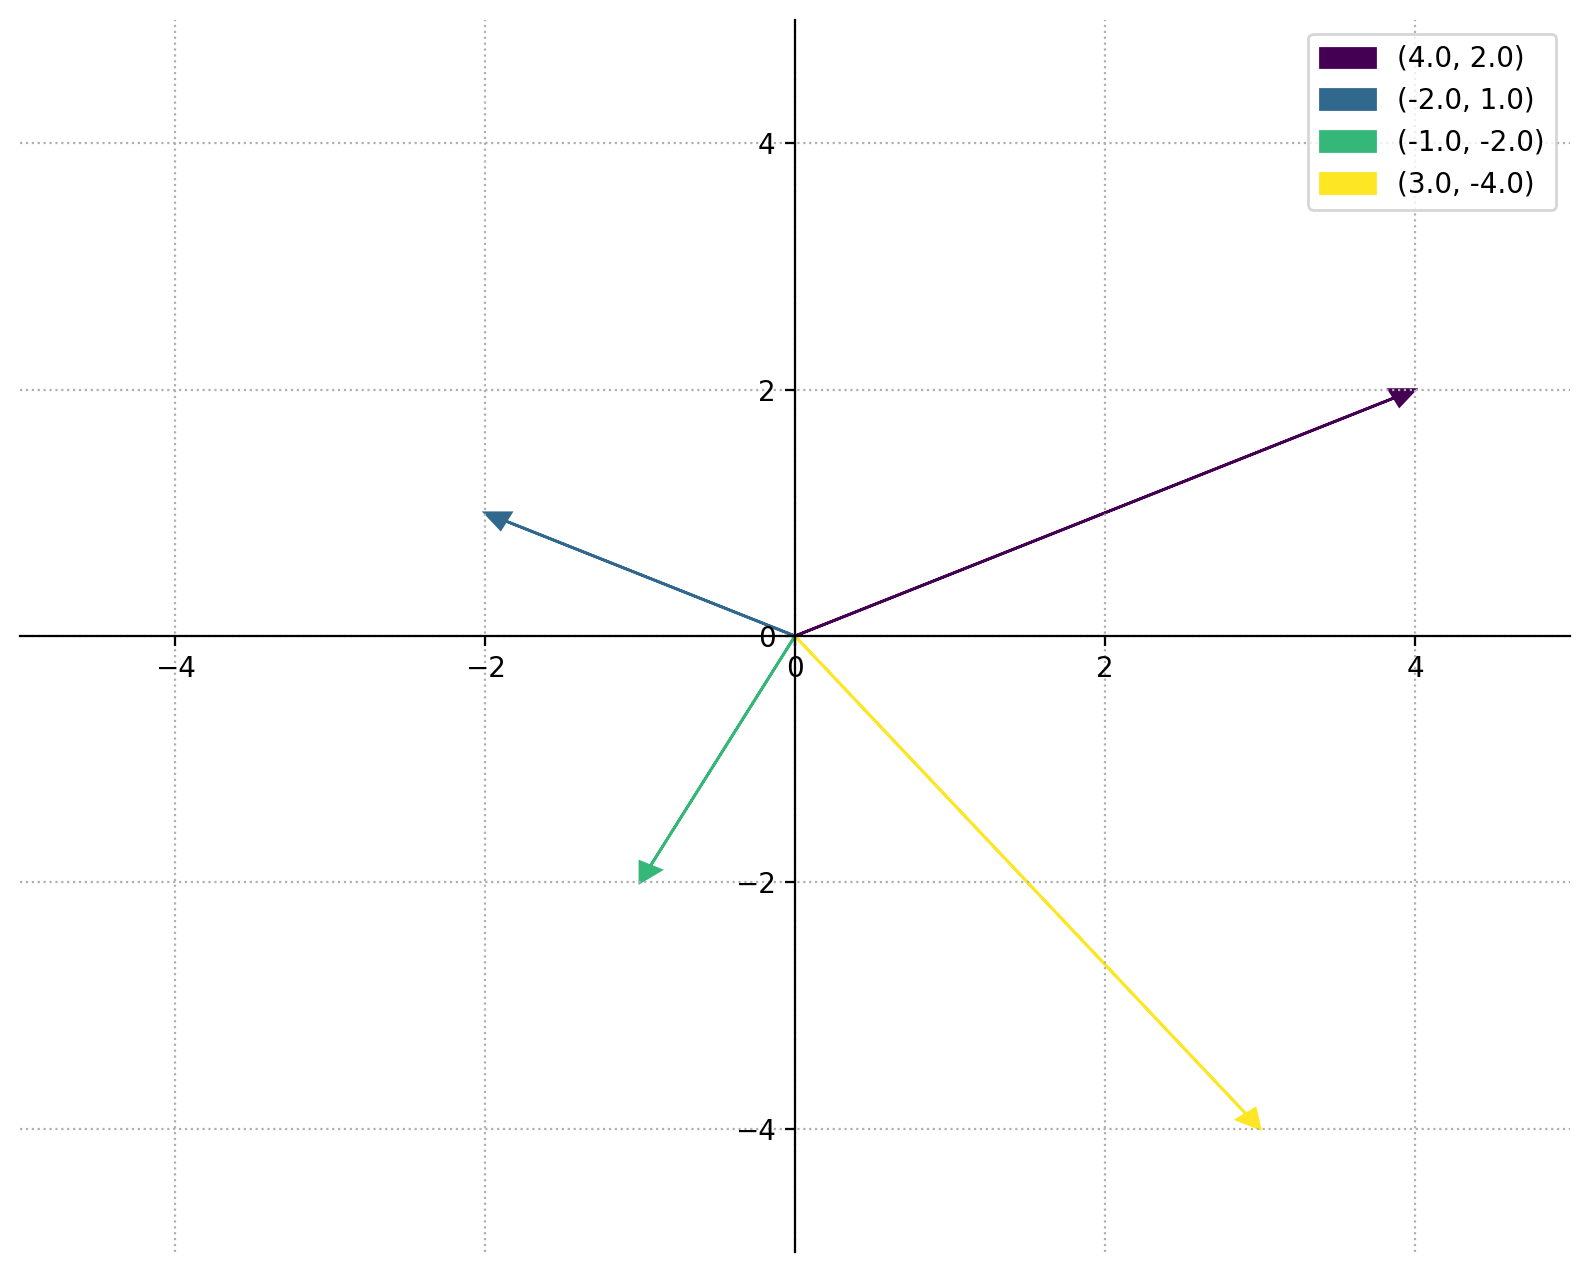

In [23]:
plot_vectors([a,b,c,d], (-5,5))

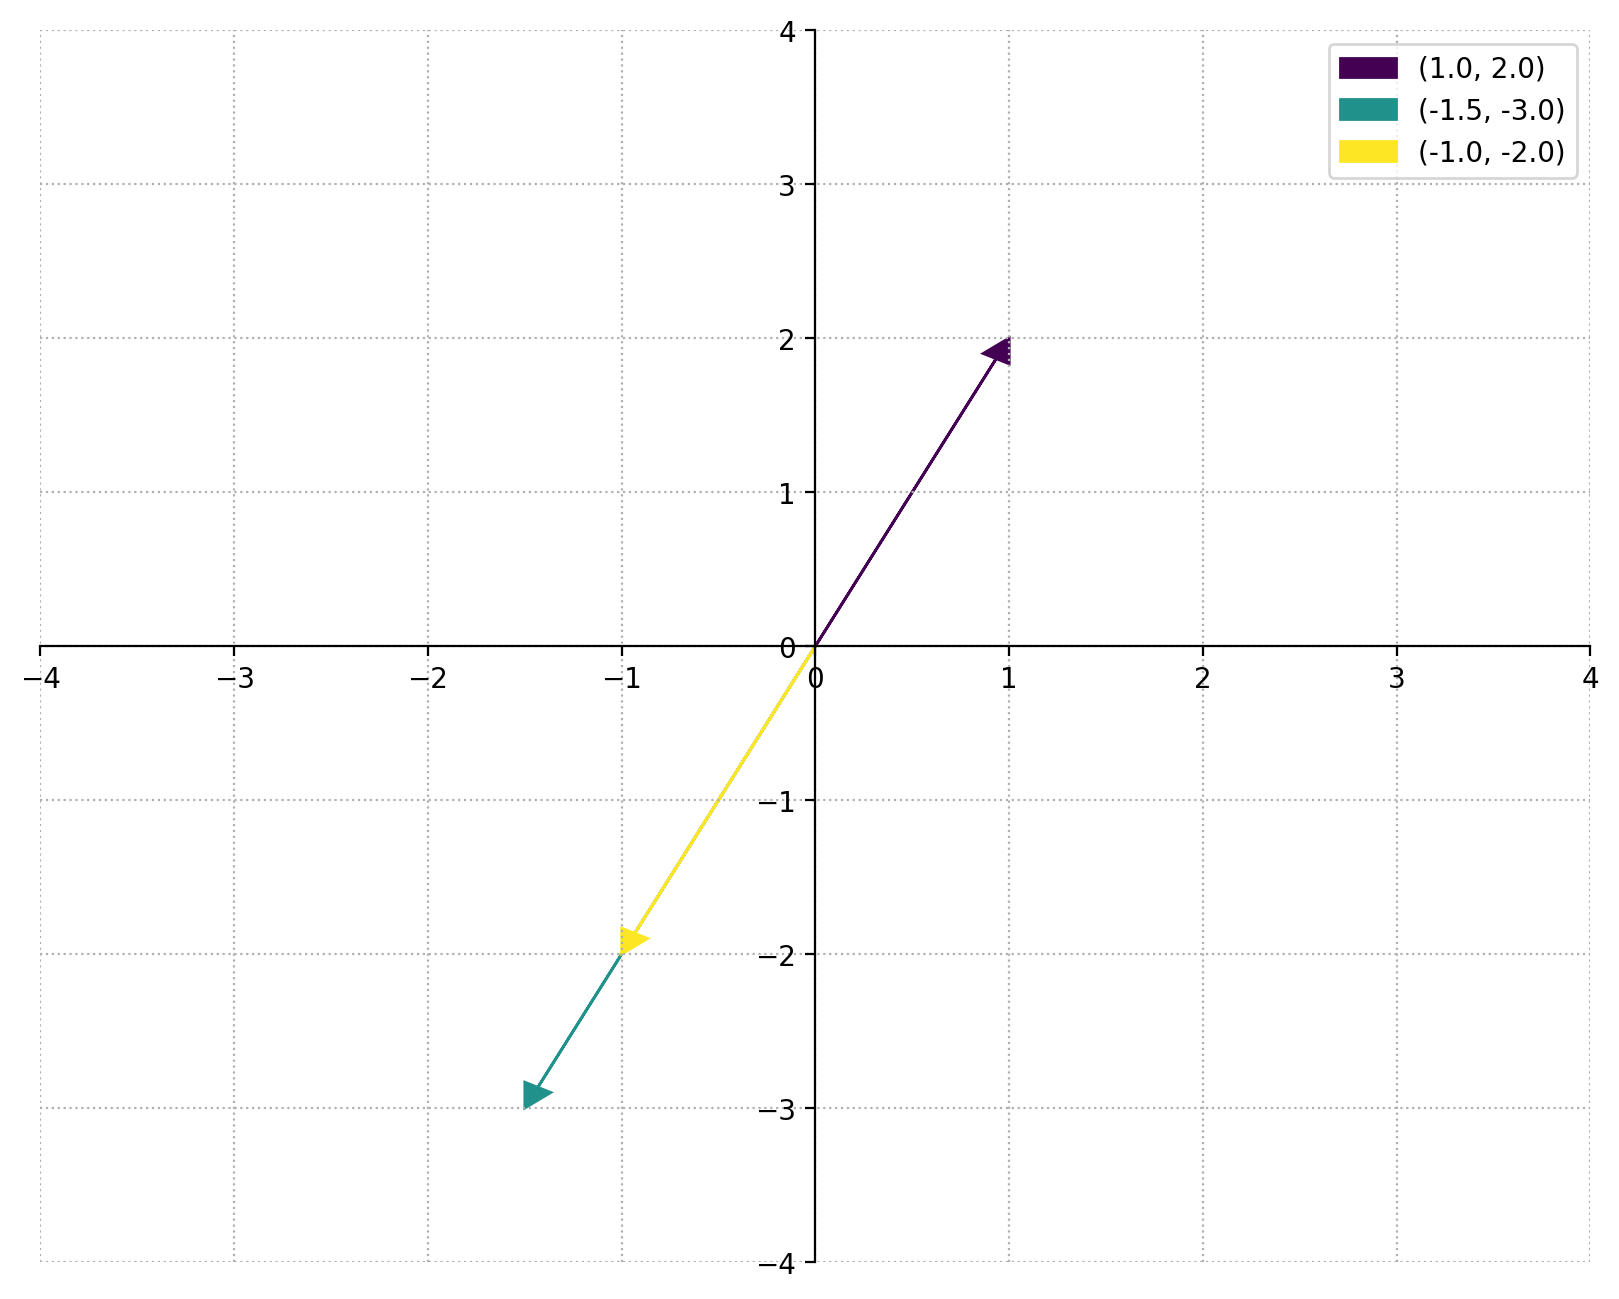

In [24]:
plot_vectors([-1*c, 1.5*c, c], (-4,4))

### Vector norms

The *length* of a vector is the distance from the origin to the terminal point of the vector. It is given by the $\ell^2$ or “Euclidean” norm

```{math}
:label: l2norm
||{\boldsymbol {x}}||_2 := \sqrt{\mathbf{x}\cdot\mathbf{x}} = \sqrt{x_{1}^{2}+\cdots +x_{n}^{2}}.
```

It is easy to see why this is true for vectors on a 2-dimensional plane if we remember the Pythagorean Theorem.

In [25]:
from numpy.linalg import norm

norm([3, -4])

5.0

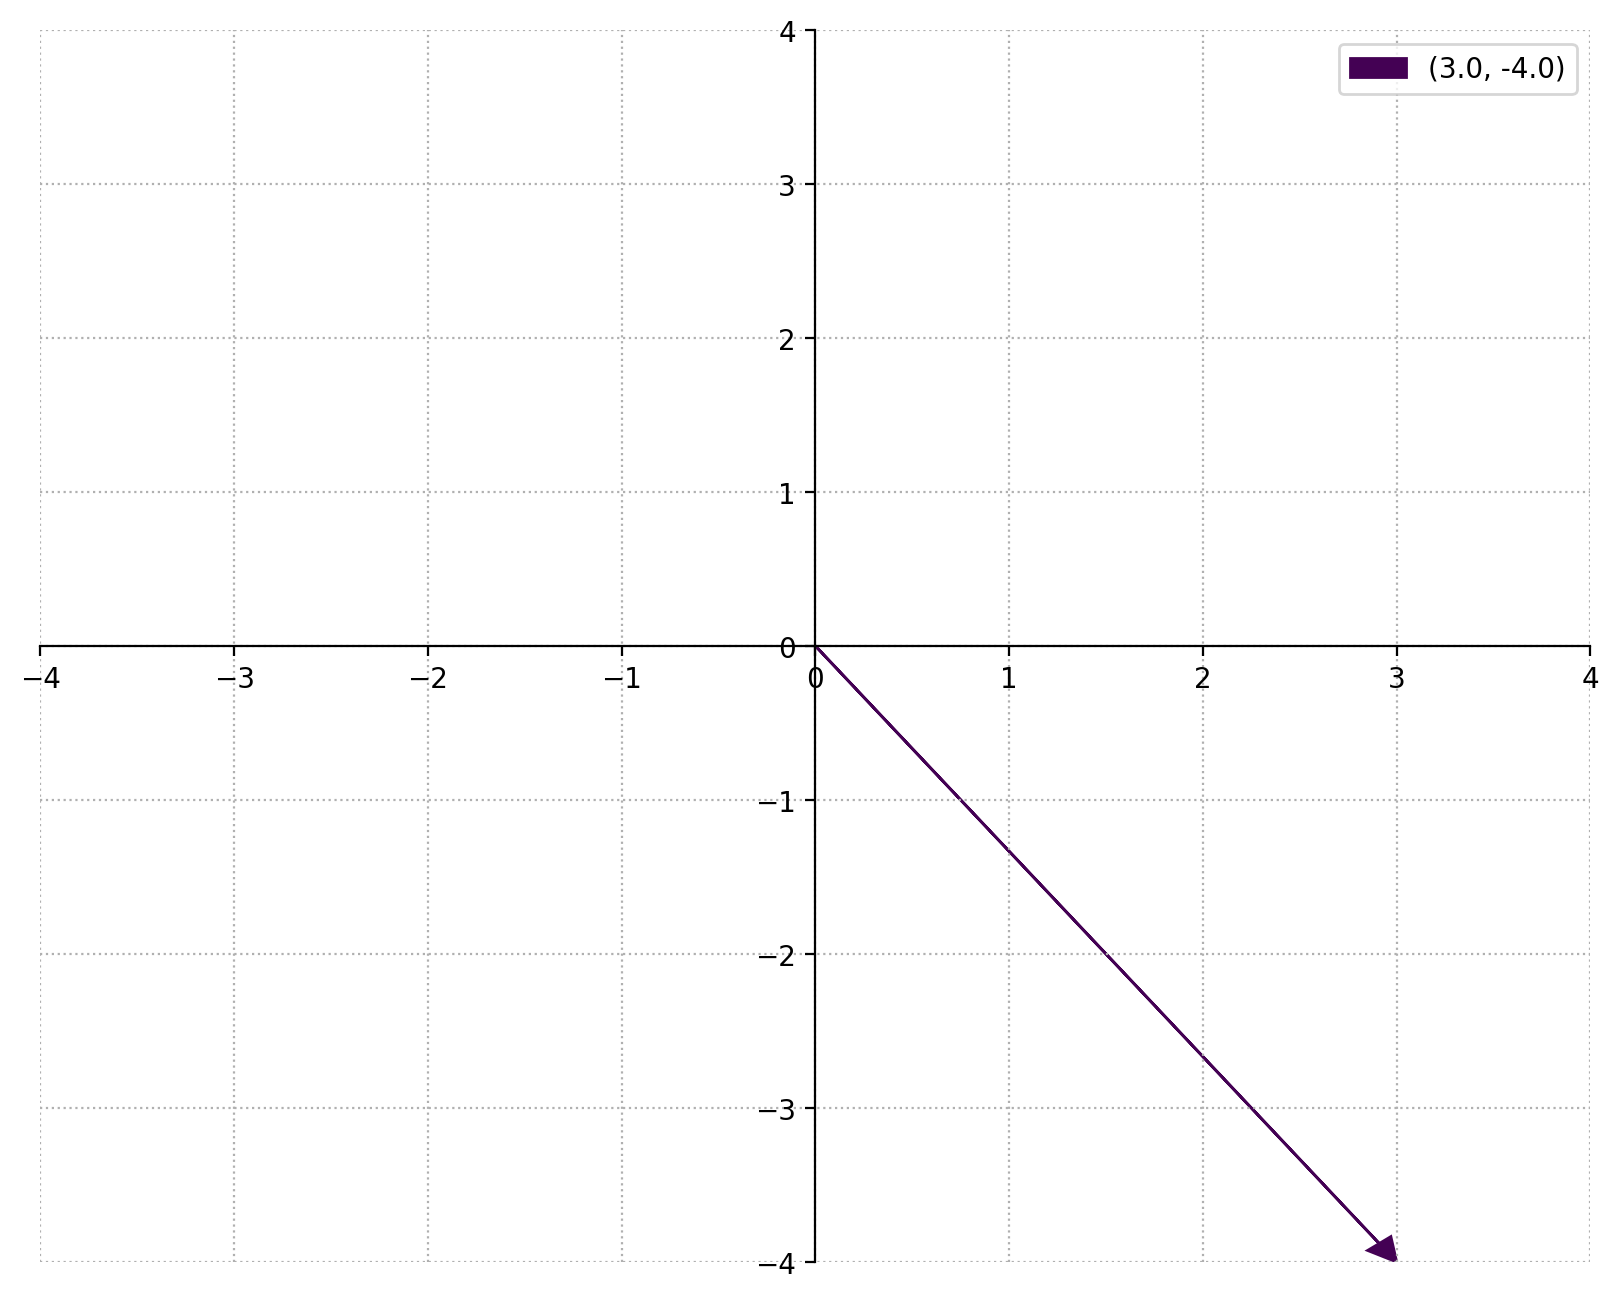

In [26]:
plot_vectors([np.array([3,-4])], (-4,4))

This is the distance between the origin and the point $(3,-4)$, which, by the Pythagorean theorm, is $5$. The function works just as easily in higher dimensions:

In [27]:
norm([1, 1, 1])

1.7320508075688772

That is, the Euclidean distance between the origin and the point $(1,1,1)$ is $\sqrt{3} \approx 1.73$.

```{margin}
The $\ell^1$ norm is also known as the “Manhattan” norm or the “taxicab” norm because it measures the distance that a car would have to travel between two points on a road laid out on a grid as in New York City.
```

Other measures of distance, or [norms](https://en.wikipedia.org/wiki/Norm_(mathematics)), are possible. The $\ell^1$ norm, for example, is given by

$$||{\boldsymbol {x}}||_1 := \sum _{i=1}^{n}\left|x_{i}\right|.$$

In [28]:
# l1 norm
norm([3, -4], ord=1)

7.0

### Dot product

The expression under the square root in equation {eq}`l2norm` is the *dot product*, $\mathbf{x}\cdot \mathbf{x}$, where

$$\mathbf{a}\cdot \mathbf{b} := \sum_{i=1}^n a_i b_i = a_1b_1 + \ldots + a_nb_n.$$

There are several ways to calculate dot products in numpy, as shown below.

In [29]:
a

array([4, 2])

In [30]:
a.dot(a)

20

In [31]:
np.dot(a,a)

20

In [32]:
# Preferred method
a @ a

20

In [33]:
# calculate length of a
np.sqrt(a  @ a)

4.47213595499958

In [34]:
# equivalently
norm(a)

4.47213595499958

### Angle between vectors

The angle $\theta$ between two vectors follows

$$\cos(\theta) = \frac{a\cdot b}{||a||\cdot||b||},$$

so

$$\theta = \cos^{-1}\left(\frac{a\cdot b}{||a||\cdot||b||}\right).$$


Two vectors are *orthogonal* if the angle between them is $\frac{\pi}{2}$ radians. Since $\cos(\pi/2)=0$, vectors are orthogonal if and only if their dot product is zero.

In [35]:
# angle between a and b (in radians)
np.arccos( a.dot(b) / norm(a) / norm(b))

2.214297435588181

In [36]:
# convert to degrees
np.degrees(2.214297435588181)

126.86989764584402

In [37]:
# angle between b and c
np.arccos( b.dot(c) / norm(b) / norm(c))

1.5707963267948966

This is indeed equal to $\pi/2$:

In [38]:
π/2

1.5707963267948966

So $b$ and $c$ must be orthoganal, which we may confirm by checking that their dot product is zero:

In [39]:
b @ c

0

In financial applications we often use the dot product of vectors to calculated a weighted sum. For example, suppose we have a vector of weights

$$\mathbf{w} = (w_1, w_2, w_3).$$

Then the dot product

$$\mathbf{x}\cdot\mathbf{w} = w_1 x_1 + w_2 x_2 + w_3 x_3$$

is simply the weighted sum of the elements of $\mathbf{x}$.

## Matrices

A matrix is a tabular collection of vectors, each with the same number of elements. For example, let $\mathbf{A}$ be an $m\times n$ matrix and $\mathbf{B}$ be an $n\times p$ matrix,

$$\mathbf {A} ={\begin{pmatrix}a_{11}&a_{12}&\cdots &a_{1n}\\a_{21}&a_{22}&\cdots &a_{2n}\\\vdots &\vdots &\ddots &\vdots \\a_{m1}&a_{m2}&\cdots &a_{mn}\\\end{pmatrix}},\quad \mathbf {B} ={\begin{pmatrix}b_{11}&b_{12}&\cdots &b_{1p}\\b_{21}&b_{22}&\cdots &b_{2p}\\\vdots &\vdots &\ddots &\vdots \\b_{n1}&b_{n2}&\cdots &b_{np}\\\end{pmatrix}}.$$

Having defined matrices, it becomes useful to distinguish between two types of vectors: a $1\times n$ *row vector*

$${\displaystyle \mathbf{a} = (a_1, \ldots, a_n)},$$

and an $n\times 1$ *column vector*

$$\mathbf{b} = \begin{pmatrix}
b_1\\ 
\vdots\\ 
b_n 
\end{pmatrix}.$$

We can think of a matrix either as a group of row vectors stack on top of each other, or a group of column vectors stacked next to each other.

### Matrix multiplication

The matrix product $\mathbf{C} = \mathbf{AB}$ is defined to be the $m \times p$ matrix

$${\displaystyle \mathbf {C} ={\begin{pmatrix}c_{11}&c_{12}&\cdots &c_{1p}\\c_{21}&c_{22}&\cdots &c_{2p}\\\vdots &\vdots &\ddots &\vdots \\c_{m1}&c_{m2}&\cdots &c_{mp}\\\end{pmatrix}}}$$

such that 

\begin{align*}
c_{ij} &= a_{i1}b_{1j}+a_{i2}b_{2j}+\cdots +a_{in}b_{nj} \\
&= \sum_{k=1}^{n}a_{ik}b_{kj},
\end{align*}

for $i=1,\ldots,m$ and $j=1,\ldots,p.$ Obviously, such multiplication is only possible when the number of columns of $\mathbf{A}$ equals the number of rows of $\mathbf{B}.$ 

The diagram below provides an illustration of the mechanics of matrix multiplication.

```{figure} https://upload.wikimedia.org/wikipedia/commons/e/e5/MatrixMultiplication.png
:name: matrix-multiplication-fig
:width: 500px
:align: center

Matrix multiplication. Source: <a href="https://commons.wikimedia.org/wiki/File:MatrixMultiplication.png">Svjo</a>, <a href="https://creativecommons.org/licenses/by-sa/4.0">CC BY-SA 4.0</a>, via Wikimedia Commons.
```

A matrix in numpy is just an array with two dimensions. Here we create two matrices, $A$ and $B$, to work with.

In [40]:
A = np.array([[ 3,  2, -2],
              [ 1, -4,  3],
              [-2,  1, -2]])

B = np.array([[ 1,  3, -2],
              [ 2,  -1,  2],
              [ 3,  1, -1]])

To multiply matrices we take the dot product.

In [41]:
A @ B

array([[  1,   5,   0],
       [  2,  10, -13],
       [ -6,  -9,   8]])

### Identity matrix

The identity matrix has ones along the main diagonal and zeros elsewhere:

$$\mathbf{I} := {\begin{pmatrix}1 & 0 & \cdots & 0\\ 0 & 1 & \cdots & 0\\\vdots &\vdots &\ddots &\vdots \\0 & 0 & \cdots &1\\\end{pmatrix}}.$$

Multiplying any matrix or vector by the appropriately-sized identity matrix is like multiplying any number by one — we just get the initial matrix or vector as the answer.

```{margin}
`numpy` follows a convention from other programs of using a pun to refer to the identity matrix — `np.eye`. Get it?
```

In [42]:
np.eye(3)

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

In [43]:
# multiply by the identity matrix
A @ np.eye(3)

array([[ 3.,  2., -2.],
       [ 1., -4.,  3.],
       [-2.,  1., -2.]])

### Transpose

Two transformations of matrices are frequently used. The first is the *transpose*, in which all of the elements are reflected across the main diagonal. Equivalently, we can think of writing all of the rows as the columns, and all the columns as rows.

$$\mathbf{A}' := {\begin{pmatrix}a_{11}&a_{21}&\cdots &a_{m1}\\a_{12}&a_{22}&\cdots &a_{m2}\\\vdots &\vdots &\ddots &\vdots \\a_{1m}&a_{2m}&\cdots &a_{mn}\\\end{pmatrix}}$$

In [44]:
A.T

array([[ 3,  1, -2],
       [ 2, -4,  1],
       [-2,  3, -2]])

The transpose of a row vector is a column vector, and vice versa. Therefore, the dot product $\mathbf{x} \cdot \mathbf{x}$ for a column vector $\mathbf{x}$ can also be written as $\mathbf{x}'\mathbf{x}$.

```{warning}
If $\mathbf{x}$ were a row vector, $\mathbf{x}'\mathbf{x}$ would be a square matrix, not a scalar. Always pay attention to the dimensions of what is being multiplied.
```

For example, given a vector of portfolio weights

$$\boldsymbol{\omega} = (\omega_1, \ldots, \omega_N)'$$

with corresponding asset returns

$$\mathbf{R} = (R_1, \ldots, R_N)',$$

the portfolio return is simply $\boldsymbol{\omega}' \mathbf{R}$.


Another often-seen example is defining an $N$-vector of ones,

$$\mathbf{1} = (1, 1, \ldots, 1)'$$

in which case

$$\mathbf{1}'\mathbf{1} = N.$$

```{note}
The transpose is sometimes written as $\mathbf{x}^\intercal$, but in economics and finance, people mostly use the “prime” symbol as in $\mathbf{x}'$ instead. While this could be confused with the derivative symbol, the meaning should usually be quite clear. For example, while it is reasonable to assume that $f'(x)$ is the derivative of the function $f$ with respect to $x$, it wouldn't make sense that $\mathbf{x}'$ would be a derivative since $\mathbf{x}$ isn't a function.
```

### Inverse

The second important transformation is the *inverse* of $\mathbf{A}$. This is the matrix $\mathbf{A}^{-1}$ such that

$$\mathbf{A} \times \mathbf{A}^{-1} = \mathbf{I}.$$

If a matrix is not square it may have a *left inverse* and a *right inverse*. A square matrix has only one inverse, which can be multiplied on either side.

In [45]:
from numpy.linalg import inv

A @ inv(A)

array([[ 1.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 0.00000000e+00,  1.00000000e+00, -4.44089210e-16],
       [-1.11022302e-16,  0.00000000e+00,  1.00000000e+00]])

There is some rounding error in this calculation, but if you look closely you'll see that this is indeed the identity matrix. We can see this by using `np.allclose(a,b)`, a boolean function that returns `True` when the corresponding elements of `a` and `b` are all "close," meaning the difference between them is negligible, perhaps due to numerical imprecision.

In [46]:
np.allclose(A @ inv(A), np.eye(3))

True

In the case of a $2\times 2$ matrix, the inverse is given by

$$
\left(\begin{array}{ll}
a & b \\
c & d
\end{array}\right)^{-1}=\frac{1}{a d-c b}\left(\begin{array}{cc}
d & -b \\
-c & a
\end{array}\right)
$$(inv22)

:::{admonition} Exercise

Show that equation {eq}`inv22` is correct by multiplying the inverse by the original matrix and confirming that the result is the identity matrix.

:::

### Solving systems of equations

Matrices are especially useful for compactly writing systems of equations. For example, consider the system of $m$ linear equations

$${\begin{matrix}a_{11}x_{1}+\cdots +a_{1n}x_{n}=b_{1}\\a_{21}x_{1}+\cdots +a_{2n}x_{n}=b_{2}\\\vdots \\a_{m1}x_{1}+\cdots +a_{mn}x_{n}=b_{m}\end{matrix}}.$$

By defining the column vectors $\mathbf{x}$ and $\mathbf{b}$, the system can be written in matrix notation as ${\displaystyle \mathbf {Ax} =\mathbf {b}}.$

Premultiplying both sides of this equation by $\mathbf{A}^{-1}$ allows us to solve for $\mathbf{x}$,

$$\mathbf{x} = \mathbf{A}^{-1} \mathbf{b}.$$

For example, suppose we wish to solve the system of equations

\begin{align*}
3x_1 + 2x_2 - 2x_3 &= 1,\\
x_1 - 4x_2 + 3x_3 &= 2, \\
-2x_1 + x_2 + -2x_3 &= -6.
\end{align*}

Writing this in $\mathbf {Ax} =\mathbf {b}$ form, we have

$$
\begin{pmatrix}3 & 2 & -2 \\ 1 & -4 & 3 \\ -2 & 1 & -2 \end{pmatrix} \begin{pmatrix}x_1\\x_2\\x_3\end{pmatrix} =\begin{pmatrix}1\\2\\-6\end{pmatrix}.
$$ (a_inv_b)

Solving for $\mathbf{x} := (x_1, x_2, x_3)'$ using {eq}`a_inv_b`  is straightforward with `numpy`.

In [47]:
b = np.array([[1], [2], [-6]])

In [48]:
x = inv(A) @ b
x

array([[1.],
       [2.],
       [3.]])

So $x_1=1$, $x_2=2$, and $x_3=3$.

In [49]:
# Confirm that Ax = b
A @ x

array([[ 1.],
       [ 2.],
       [-6.]])

Multiplying a matrix by a vector applies a linear transformation to the vector. In the case of $\mathbf{A}^{-1} \mathbf{b}$, we transform the $\mathbf{b}$ vector into the $\mathbf{x}$ vector according to the transformation given by $\mathbf{A}^{-1}$. Similarly, applying $\mathbf{A}$ to $\mathbf{x}$ will rotate and stretch it so it equals $\mathbf{b}$.

### Quadratic form

In many finance applications we will often encounter the *quadratic form*

$$\mathbf{x'Ax},$$ (qform)

where $\mathbf{A}$ is a *symmetric* matrix, meaning for all elements, $a_{ij}=a_{ji}$.

The derivative of a quadratic form is

$$\frac{d}{d\mathbf{x}} \mathbf{x'Ax} = 2\mathbf{Ax}.$$

:::{admonition} Exercise

Suppose $\mathbf{x}' = (w_1, w_2)$ and $\mathbf{A} = \begin{pmatrix} a & b \\ b & c \end{pmatrix}.$ Calculate the quadratic form as in equation {eq}`qform` by hand. Take the derivative of each equation and confirm that $\frac{d}{d\mathbf{x}} \mathbf{x'Ax} = 2\mathbf{Ax}.$
:::

:::{admonition} Solution
:class: admonition-solution, dropdown

This solution uses `sympy` to do the calculations, but I encourage you to do the calculations yourself.

```
from sympy import symbols, Matrix, expand, diff, factor

w1, w2 = symbols('w1 w2')
a, b, c = symbols('a b c')

x = Matrix([w1, w2])
A = Matrix([[a, b], [b, c]])

xpAx = x.T * A * x
xpAx
```

$$\displaystyle \left[\begin{matrix}w_{1} \left(a w_{1} + b w_{2}\right) + w_{2} \left(b w_{1} + c w_{2}\right)\end{matrix}\right]$$

```
# The answer is represented as a 1x1 matrix, so we'll just make it a scalar
xpAx = expand(xpAx[0])
xpAx
```

$$\displaystyle a w_{1}^{2} + 2 b w_{1} w_{2} + c w_{2}^{2}$$

```
diff(xpAx, w1)
```

$$\displaystyle 2 a w_{1} + 2 b w_{2}$$

```
diff(xpAx, w2)
```

$$\displaystyle 2 b w_{1} + 2 c w_{2}$$

These results are clearly the same as $2A\mathbf{x}$:

```
2 * A * x
```

$$\displaystyle \left[\begin{matrix}2 a w_{1} + 2 b w_{2}\\2 b w_{1} + 2 c w_{2}\end{matrix}\right]$$
:::

:::{admonition} Exercise

Use `sympy` to confirm that $e^{\pi i} + 1 = 0.$ Check also that `numpy` gives the same result. Here you'll want to begin by defining `i = 0 + 1j` as the imaginary part of a complex number.
:::

:::{admonition} Solution
:class: admonition-solution, dropdown

For Question 2, just put the mathematical expression into `sympy`.

```
# notice that we are *overloading* the exp function here

from sympy import exp, pi, I
x = symbols('x')

exp(pi * I) + 1
```

0


And we can use `numpy` to verify that the calculation gives an answer of zero. (If you look at `z` here you'll see it's not exactly zero, but is really close. I'm using `np.isclose` to verify that the difference is neglibible.

```
i = 0 + 1j
z = np.exp(np.pi * i) + 1Mm
np.isclose(z, 0)
```

True
:::

In [50]:
from sympy import symbols, Matrix, expand, diff, factor

w1, w2 = symbols('w1 w2')
a, b, c = symbols('a b c')

x = Matrix([w1, w2])
A = Matrix([[a, b], [b, c]])

xpAx = x.T * A * x
xpAx

# The answer is represented as a 1x1 matrix, so we'll just make it a scalar
xpAx = expand(xpAx[0])
xpAx

diff(xpAx, w1)

diff(xpAx, w2)

2 * A * x

# notice that we are *overloading* the exp function here

from sympy import exp, pi, I
x = symbols('x')

exp(pi * I) + 1

i = 0 + 1j
z = np.exp(np.pi * i) + 1
np.isclose(z, 0)

True

In [51]:
# 3x3 quadratic

w1, w2, w3 = symbols('w1 w2 w3')
_as = symbols('a11 a12 a13 a21 a22 a23 a31 a32 a33')


x = Matrix([w1, w2, w3])
A = Matrix([_as[:3], _as[3:6], _as[6:]])

xpAx = x.T * A * x
xpAx = expand(xpAx[0])
xpAx

a11*w1**2 + a12*w1*w2 + a13*w1*w3 + a21*w1*w2 + a22*w2**2 + a23*w2*w3 + a31*w1*w3 + a32*w2*w3 + a33*w3**2